In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.utils import resample
pd.set_option('display.max.rows' , 10)

In [2]:
df = pd.read_csv(r"D:\Data Analysis_Bootcamp\Data Mining Project\data_science_job.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020,Machine Learning Engineer (Remote),NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN
4996,2021,Machine Learning Engineer (Remote),NaN,NaN,184642,196373,CN,NaN,FL,Remote,UK,NaN
4997,2022,Machine Learning Engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S


In [4]:
# Chicking Data Types Of The Columns
print(df.dtypes)

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object


In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [6]:
# Removing Duplicate values

df.drop_duplicates()
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [26]:
# Chicking If There Is Any Missing Values

missing_values = df.isnull().sum()
print(missing_values)

work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64


In [45]:
# Getting The Most Frequent Data To Replace Missing Values With it

print(df['job_category'].mode()[0])
print(df['salary_currency'].mode()[0])
print(df['experience_level'].mode()[0])
print(df['company_size'].mode()[0])

Data Science
EUR
SE
S


In [8]:
# Chickung the data if balance or imbalance

class_count = df['job_category'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['salary_currency'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['experience_level'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['company_size'].value_counts()
print(class_count)
print('-------------------------------------')


job_category
Data Science    1173
ML/AI           1151
Analysis        1108
Engineering     1068
Name: count, dtype: int64
-------------------------------------
salary_currency
EUR          962
INR          916
JPY          891
us dolars    875
GBP          856
Name: count, dtype: int64
-------------------------------------
experience_level
SE    1154
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64
-------------------------------------
company_size
S    1519
M    1517
L    1464
Name: count, dtype: int64
-------------------------------------


In [3]:
# Assigning "Unnown" to "salary_currency" column

df['salary_currency'] = df['salary_currency'].fillna('Unnown')

In [4]:
# Filling the other missing values with the most frequent value (MODE)
most_frequent = df['company_size'].mode()[0]
df['company_size'] = df['company_size'].fillna(most_frequent)


In [17]:
# Chickung the data if balance or imbalance

class_count = df['job_category'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['salary_currency'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['experience_level'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['company_size'].value_counts()
print(class_count)
print('-------------------------------------')

job_category
Data Science    1673
ML/AI           1151
Analysis        1108
Engineering     1068
Name: count, dtype: int64
-------------------------------------
salary_currency
EUR          962
INR          916
JPY          891
us dolars    875
GBP          856
Unnown       500
Name: count, dtype: int64
-------------------------------------
experience_level
SE    1654
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64
-------------------------------------
company_size
S    2019
M    1517
L    1464
Name: count, dtype: int64
-------------------------------------


In [ ]:
# Now the data is imbalance for (job_category---experience_level---company_size)
# we need to over sample our data

<Axes: title={'center': 'undersampling'}, xlabel='job_category'>

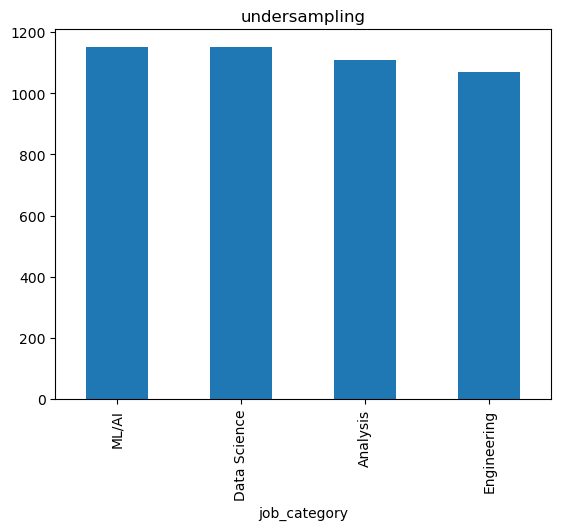

In [31]:
# job_category oversampling

#classes count
count_class_DataScience , count_class_MLAI , count_class_Analysis , count_class_Engineering = df.job_category.value_counts()

# divide the data by class
df_class_DataScience = df[df['job_category'] == 'Data Science']
df_class_MLAI = df[df['job_category'] == 'ML/AI']
df_class_Analysis = df[df['job_category'] == 'Analysis']
df_class_Engineering = df[df['job_category'] == 'Engineering']

# Find the size of the smallest class (here, the minority classes)
min_class_size = max(len(df_class_MLAI), len(df_class_Analysis), len(df_class_Engineering))

# Perform under-sampling by randomly selecting the same number of samples from the majority class
df_class_DataScience = df_class_DataScience.sample(n=min_class_size, random_state=42)

# Combine all the classes back into a balanced dataset
df_balanced = pd.concat([df_class_DataScience, df_class_MLAI, df_class_Analysis, df_class_Engineering])

# Shuffle the data to avoid any order bias
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.job_category.value_counts().plot(kind = 'bar' , title = 'undersampling')